### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [5]:
pip install pyspark findspark

Note: you may need to restart the kernel to use updated packages.


In [6]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [6]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


1. Cari rata-rata gaji per departemen

In [10]:
spark.sql('''
SELECT AVG(Salary) as AverageSalary, DeptId
FROM employees
GROUP BY Gender, DeptId
ORDER BY DeptId
''').show()

+-------------+------+
|AverageSalary|DeptId|
+-------------+------+
|       2850.0|     1|
|       4100.0|     2|
+-------------+------+



2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.

In [15]:
spark.sql('''
SELECT Name, Salary 
FROM employees 
WHERE Salary > 2850
GROUP BY Name, Salary
''').show()

+-----+------+
| Name|Salary|
+-----+------+
|James|  3000|
| Anna|  4100|
+-----+------+



3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.

In [18]:
spark.sql('''
SELECT Name, DeptId,Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [20]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [205]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Wann', 20, 'M', 4000, 2)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Wann| 20|Marketing|  Project B|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

**Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.

In [60]:
spark.sql('''
SELECT d.DeptName, AVG(e.Salary) AS RataRataGaji
FROM employees e
JOIN departments d
ON e.DeptId = d.DeptId
Group BY d.DeptName
ORDER BY RataRataGaji DESC
''').show()
spark.sql('''
SELECT Name, DeptId,Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()

+---------+------------+
| DeptName|RataRataGaji|
+---------+------------+
|Marketing|      4050.0|
|       HR|      2850.0|
+---------+------------+

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
| Wann|     2|  4000|   2|
+-----+------+------+----+



**Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

In [54]:
spark.sql("""
SELECT
    d.DeptName,
    e.Name,
    e.Age,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (
        PARTITION BY e.DeptId 
        ORDER BY e.Age 
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
    ), 2) AS SalaryTrendByAge
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
""").show()

+---------+-----+---+------+----------------+
| DeptName| Name|Age|Salary|SalaryTrendByAge|
+---------+-----+---+------+----------------+
|       HR|  Lee| 23|  2700|          2700.0|
|       HR|James| 34|  3000|          2850.0|
|Marketing| Wann| 20|  4000|          4000.0|
|Marketing| Anna| 28|  4100|          4050.0|
+---------+-----+---+------+----------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


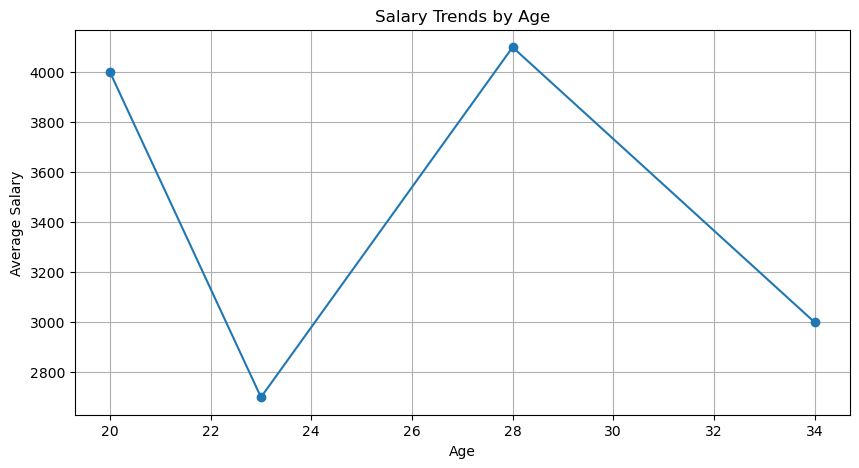

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


**Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.

    DeptName  TotalSalary  EmployeeCount
0  Marketing         8100              2
1         HR         5700              2


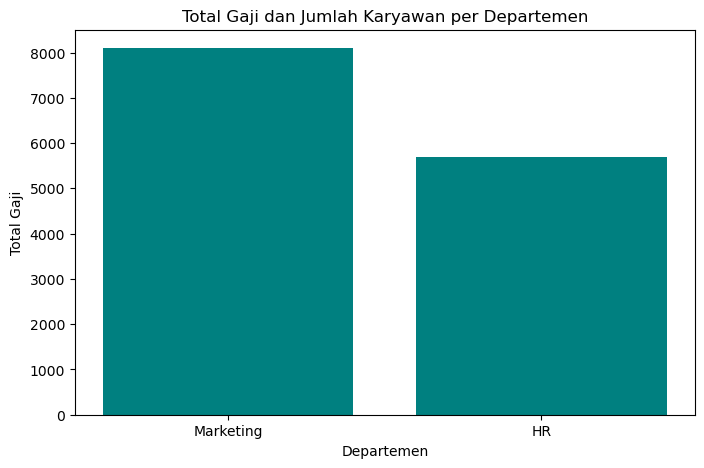

In [180]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Inisialisasi Spark
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data employees, departments, dan projects
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Wann', 20, 'M', 4000, 2)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

# Membuat temporary views untuk tabel
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Query untuk total gaji dan jumlah karyawan per departemen
dept_salary = spark.sql('''
SELECT d.DeptName, 
       SUM(e.Salary) AS TotalSalary,
       COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''').toPandas()

# Menampilkan hasil query
print(dept_salary)

# Visualisasi bar chart
plt.figure(figsize=(8, 5))

# Membuat bar chart untuk total gaji per departemen
plt.bar(dept_salary['DeptName'], dept_salary['TotalSalary'], color='teal', label='TotalSalary')

# Menambahkan label dan judul
plt.title('Total Gaji dan Jumlah Karyawan per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')

# Menampilkan grafik
plt.show()

**Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart

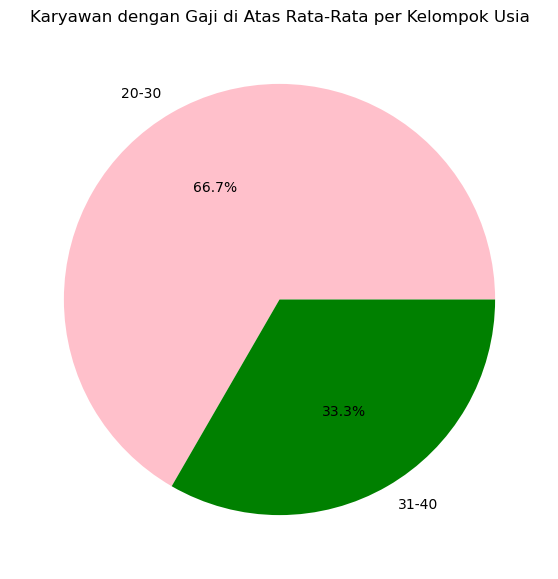

In [191]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Inisialisasi Spark
spark = SparkSession.builder.appName('Tugas2').getOrCreate()

# Data employees
data = [
    ('James', 34, 3000),
    ('Anna', 28, 4100),
    ('Lee', 23, 2700),
    ('Wann', 20, 4000),
    ('Bob', 29, 3500),
    ('Cathy', 45, 5500),
    ('David', 38, 6000)
]
employees = spark.createDataFrame(data, ['Name', 'Age', 'Salary'])
employees.createOrReplaceTempView('employees')

# Query: karyawan dengan gaji di atas rata-rata per kelompok usia
above_avg = spark.sql('''
WITH avg_per_agegroup AS (
  SELECT CASE
           WHEN Age BETWEEN 20 AND 30 THEN '20-30'
           WHEN Age BETWEEN 31 AND 40 THEN '31-40'
           WHEN Age BETWEEN 41 AND 50 THEN '41-50'
           ELSE '51+' END AS AgeGroup,
         AVG(Salary) AS avg_salary
  FROM employees
  GROUP BY AgeGroup
)
SELECT e.Name, e.Age, e.Salary, a.AgeGroup
FROM employees e
JOIN avg_per_agegroup a 
  ON (CASE
        WHEN e.Age BETWEEN 20 AND 30 THEN '20-30'
        WHEN e.Age BETWEEN 31 AND 40 THEN '31-40'
        WHEN e.Age BETWEEN 41 AND 50 THEN '41-50'
        ELSE '51+' END) = a.AgeGroup
WHERE e.Salary > a.avg_salary
''').toPandas()

# Hitung jumlah per kelompok usia
counts = above_avg['AgeGroup'].value_counts()

# Visualisasi Pie Chart
plt.figure(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
        colors=['pink','green','skyblue','lightcoral'])
plt.title('Karyawan dengan Gaji di Atas Rata-Rata per Kelompok Usia')
plt.show()

**Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.

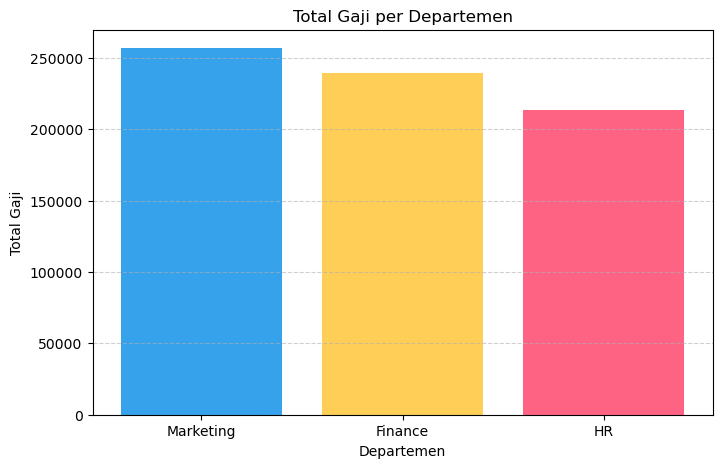

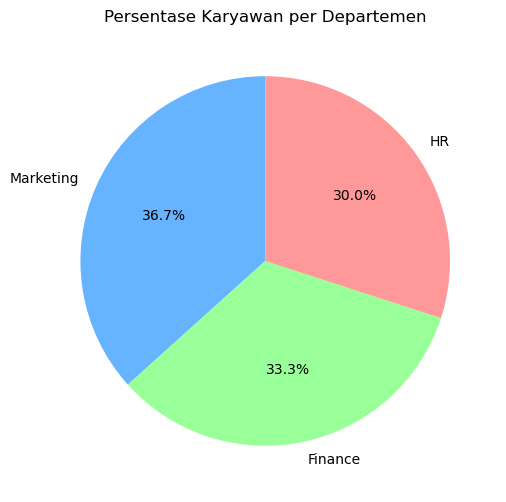

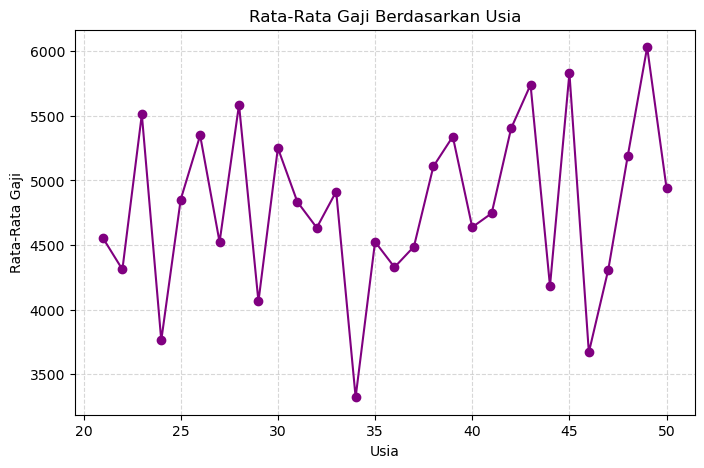

<Figure size 800x500 with 0 Axes>

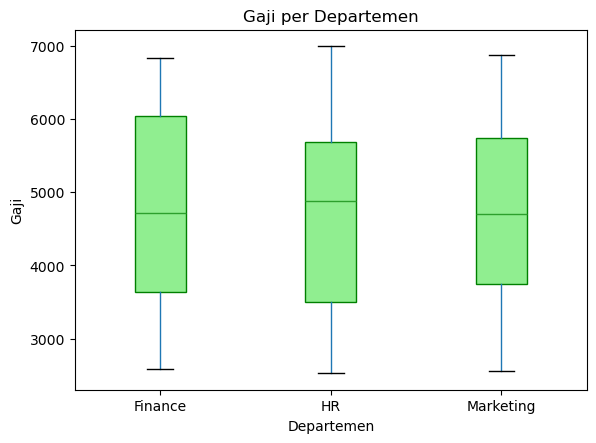

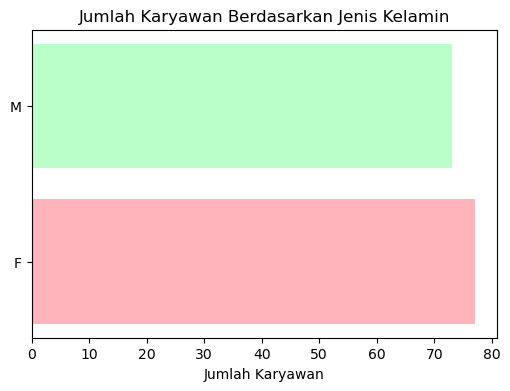

In [202]:
import random
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Tugas3").getOrCreate()

# Membuat dataset acak (150 data karyawan)
names = ['James', 'Anna', 'Lee', 'John', 'Sarah', 'David', 'Sophia', 'Lucas', 'Emily', 'Michael']
departments = [(1, 'HR'), (2, 'Marketing'), (3, 'Finance')]
data_karyawan = [
    (random.choice(names),
     random.randint(21, 50),
     random.choice(['M', 'F']),
     random.randint(2500, 7000),
     random.choice([1, 2, 3]))
    for _ in range(150)
]

# Membuat DataFrame Spark
employees = spark.createDataFrame(data_karyawan, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments_df = spark.createDataFrame(departments, ['DeptId', 'DeptName'])

# Temporary view untuk SQL
employees.createOrReplaceTempView("employees")
departments_df.createOrReplaceTempView("departments")

# Analisis utama dengan fungsi SQL dan JOIN
analysis = spark.sql("""
SELECT d.DeptName,
       COUNT(e.Name) AS JumlahKaryawan,
       ROUND(AVG(e.Salary), 2) AS RataRataGaji,
       SUM(e.Salary) AS TotalGaji
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalGaji DESC
""").toPandas()

# Analisis tambahan
gender_count = spark.sql("SELECT Gender, COUNT(*) AS Jumlah FROM employees GROUP BY Gender").toPandas()
age_avg_salary = spark.sql("SELECT Age, AVG(Salary) AS AvgSalary FROM employees GROUP BY Age ORDER BY Age").toPandas()
gaji_dept = spark.sql("SELECT d.DeptName, e.Salary FROM employees e JOIN departments d ON e.DeptId = d.DeptId").toPandas()

# --- VISUALISASI ---

# 1️⃣ Bar Chart: Total gaji per departemen
plt.figure(figsize=(8,5))
plt.bar(analysis['DeptName'], analysis['TotalGaji'], color=['#36A2EB','#FFCE56','#FF6384'])
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen'); plt.ylabel('Total Gaji')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 2️⃣ Pie Chart: Persentase jumlah karyawan per departemen
plt.figure(figsize=(6,6))
plt.pie(analysis['JumlahKaryawan'], labels=analysis['DeptName'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Persentase Karyawan per Departemen')
plt.show()

# 3️⃣ Line Chart: Rata-rata gaji berdasarkan usia
plt.figure(figsize=(8,5))
plt.plot(age_avg_salary['Age'], age_avg_salary['AvgSalary'], color='purple', marker='o')
plt.title('Rata-Rata Gaji Berdasarkan Usia')
plt.xlabel('Usia'); plt.ylabel('Rata-Rata Gaji')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4️⃣ Boxplot: Distribusi gaji per departemen 
plt.figure(figsize=(8,5))
gaji_dept.boxplot(column='Salary', by='DeptName', grid=False, patch_artist=True,
                  boxprops=dict(facecolor='#90ee90', color='green'))
plt.title('Gaji per Departemen')
plt.suptitle('')
plt.xlabel('Departemen'); plt.ylabel('Gaji')
plt.show()

# 5️⃣ Horizontal Bar: Jumlah karyawan per jenis kelamin
plt.figure(figsize=(6,4))
plt.barh(gender_count['Gender'], gender_count['Jumlah'], color=['#ffb3ba','#baffc9'])
plt.title('Jumlah Karyawan Berdasarkan Jenis Kelamin')
plt.xlabel('Jumlah Karyawan')
plt.show()